In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
titanic_df_temp= pd.read_csv('data/train.csv')
#titanic_df_temp.head()
#titanic_df_temp.dropna(inplace=True)
titanic_df_temp['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [28]:
titanic_df=titanic_df_temp.set_index('PassengerId').copy()
titanic_df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [29]:
titanic_df.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


In [30]:
def embarked_transfo(ligne) :
    if ligne['Embarked']=='C' :
        return 1
    elif ligne['Embarked']=='S' :
        return 2
    elif ligne['Embarked']=='Q' :
        return 3
    else :
        return None

def sex_transfo(ligne) :
    if ligne['Sex']=='male' :
        return 1
    elif ligne['Sex']=='female' :
        return 2
    else :
        return None

In [36]:
titanic_df_clean=titanic_df.drop(['Name'], axis='columns').copy()
titanic_df_clean.drop(['Cabin'], axis='columns', inplace=True)
#titanic_df_clean.drop(['Ticket'], axis='columns', inplace=True)
titanic_df_clean['Num_Embarked']=titanic_df_clean.apply(embarked_transfo, axis=1)
titanic_df_clean['Num_sex']=titanic_df_clean.apply(sex_transfo, axis=1)
titanic_df_clean.dropna(inplace=True)
#titanic_df_clean['Ticket'].value_counts()
titanic_df_clean

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Num_Embarked,Num_sex
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,2.0,1
2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1.0,2
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,2.0,2
4,1,1,female,35.0,1,0,113803,53.1000,S,2.0,2
5,0,3,male,35.0,0,0,373450,8.0500,S,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,female,39.0,0,5,382652,29.1250,Q,3.0,2
887,0,2,male,27.0,0,0,211536,13.0000,S,2.0,1
888,1,1,female,19.0,0,0,112053,30.0000,S,2.0,2


In [32]:
survived_df= titanic_df_clean[titanic_df_clean['Survived']==1].copy()
unsurvived_df = titanic_df_clean[titanic_df_clean['Survived']==0].copy()
survived_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Num_Embarked,Num_sex
PassengerId,,,,,,,,,,,
2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1.0,2
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,2.0,2
4,1,1,female,35.0,1,0,113803,53.1000,S,2.0,2
9,1,3,female,27.0,0,2,347742,11.1333,S,2.0,2
10,1,2,female,14.0,1,0,237736,30.0708,C,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
876,1,3,female,15.0,0,0,2667,7.2250,C,1.0,2
880,1,1,female,56.0,0,1,11767,83.1583,C,1.0,2
881,1,2,female,25.0,0,1,230433,26.0000,S,2.0,2


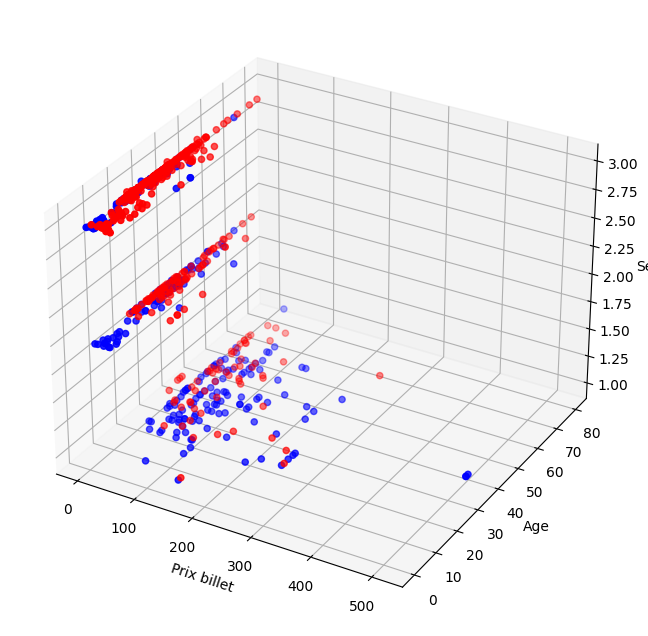

In [33]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(projection='3d')

ax.scatter(survived_df['Fare'], survived_df['Age'], survived_df['Pclass'], color='blue', label='Survived')
ax.scatter(unsurvived_df['Fare'], unsurvived_df['Age'], unsurvived_df['Pclass'], color='red', label='Dead')
ax.set_xlabel('Prix billet')
ax.set_ylabel('Age')
ax.set_zlabel('Sex')
plt.show()

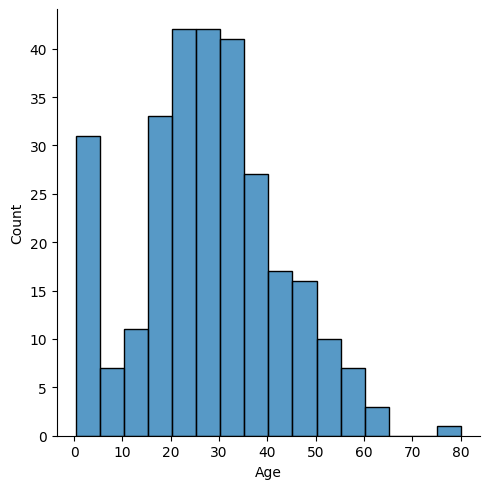

In [34]:
vis1=sns.displot(survived_df['Age'])

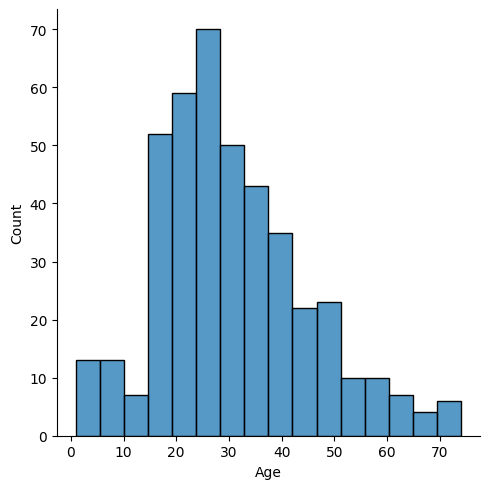

In [35]:
vis2=sns.displot(unsurvived_df['Age'])